# Exploratory analysis on the Paris food scene

This project is a statistical analysis on restaurants in Paris, France, using YELP API data. I used the YELP API to scrape summary (40.000m within the google search, "Paris, France") and collected data for 12000 restaurants.

# Import Libs & Data Pre-processing
Here, we import the needed libraries for the project to work, we read in the data and convert it to dataframe, and finaly we do some data preprocessing operations on our restaurants data.

In [2]:
# import libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import warnings
from yelphelpers import *
warnings.filterwarnings('ignore')

# read data
with open('paris_restaurants.json') as f:
    data = json.load(f)
    
with open('yelp_categories.json') as f:
    cats = json.load(f)
    
# convert to pandas dataframe
df = pd.DataFrame.from_dict(data, orient='columns')

In [2]:
print('Dataframe shape : ',df.shape)
print('Missing data:\n',df.isnull().sum())

Dataframe shape :  (12144, 16)
Missing data:
 id                  0
alias               0
name                0
image_url           0
is_closed           0
url                 0
review_count        0
categories          0
rating              0
coordinates         0
transactions        0
price            4546
location            0
phone               0
display_phone       0
distance            0
dtype: int64


<a id="clean-the-data"></a>
## Cleaning the data

* Removing unnecessary data
* One-hot encode categories list
* Convert string data into numberic data (rating, price)
* Add neighbourhood name based on zip code (see [Geographic Data](#geography))

In [3]:
#  Removing unnecessary data
df = df.drop(columns=['image_url','is_closed','transactions','phone','display_phone'])

# Removing rows with NAN values
df = df.dropna()

# Replace number signs (€) with numerical values
df.replace(['€','€€','€€€','€€€€'],[1.0,2.0,3.0,4.0], inplace=True)

In [4]:
set(df['price'])

{1.0, 2.0, 3.0, 4.0}

In [5]:
df_categories = df[['id', 'categories']]
df_categories.head()

,id,categories
0,CTwrAZ_lYy0lDg8kJrOwCQ,"[{'alias': 'afghani', 'title': 'Afghan'}]"
1,cTE0bsuIPGVbJ2Zph-69NA,"[{'alias': 'afghani', 'title': 'Afghan'}]"
2,X7ysaj_dQ1HyxzvXqMlYLw,"[{'alias': 'afghani', 'title': 'Afghan'}]"
4,2PDiGngVcBR_K3Yn4z2uZQ,"[{'alias': 'afghani', 'title': 'Afghan'}]"
6,b9YiHgy-26FQK0BO5Eem4Q,"[{'alias': 'african', 'title': 'African'}]"


In [6]:
df.drop(columns=['categories'],inplace=True)
df.rename(columns={'alias':'r_alias'},inplace=True)
df.head()

,id,r_alias,name,url,review_count,rating,coordinates,price,location,distance
0,CTwrAZ_lYy0lDg8kJrOwCQ,l-afghanistan-paris,L'Afghanistan,https://www.yelp.com/biz/l-afghanistan-paris?a...,46,4.0,"{'latitude': 48.8623, 'longitude': 2.37997}",2.0,"{'address1': '48 rue Saint-Maur', 'address2': ...",2767.030967
1,cTE0bsuIPGVbJ2Zph-69NA,buzkashi-paris-3,Buzkashi,https://www.yelp.com/biz/buzkashi-paris-3?adju...,20,4.5,"{'latitude': 48.8853416, 'longitude': 2.3257101}",2.0,"{'address1': '7 rue des Dames', 'address2': ''...",2865.039636
2,X7ysaj_dQ1HyxzvXqMlYLw,afghani-paris-2,Afghani,https://www.yelp.com/biz/afghani-paris-2?adjus...,45,4.0,"{'latitude': 48.8869825, 'longitude': 2.3452314}",2.0,"{'address1': '16 rue Paul Albert', 'address2':...",2791.650495
4,2PDiGngVcBR_K3Yn4z2uZQ,kootchi-paris-2,Kootchi,https://www.yelp.com/biz/kootchi-paris-2?adjus...,14,3.0,"{'latitude': 48.84677, 'longitude': 2.35191}",1.0,"{'address1': '40 rue du Cardinal Lemoine', 'ad...",1833.710354
6,b9YiHgy-26FQK0BO5Eem4Q,waly-fay-paris-2,Waly-Fay,https://www.yelp.com/biz/waly-fay-paris-2?adju...,83,4.0,"{'latitude': 48.854577902096, 'longitude': 2.3...",3.0,"{'address1': '6 rue Godefroy Cavaignac', 'addr...",3005.080351


In [7]:
df_expanded = df.copy().merge(expand_list(df_categories.copy(), 'categories'))

In [8]:
df_categories = expand_list(df_categories,'categories')
df_categories = pd.concat([df_categories.drop(['categories'], axis=1), df_categories['categories'].apply(pd.Series)], axis=1)
df_categories = df_categories.groupby(['id']).agg(lambda x: tuple(x)).applymap(list).reset_index()

In [9]:
df_categories.head()

,id,alias,title
0,--BNn35zxreUWlLyWajgYw,[mexican],[Mexican]
1,-0iLH7iQNYtoURciDpJf6w,[french],[French]
2,-1HO8IOTteQsB7WTK6-BDg,[spanish],[Spanish]
3,-1J4aCaiQanS_nXZT-S6aw,"[lebanese, moroccan]","[Lebanese, Moroccan]"
4,-1fF73WT42NNikWHNpkvfg,[modern_european],[Modern European]


In [10]:
df.head()

,id,r_alias,name,url,review_count,rating,coordinates,price,location,distance
0,CTwrAZ_lYy0lDg8kJrOwCQ,l-afghanistan-paris,L'Afghanistan,https://www.yelp.com/biz/l-afghanistan-paris?a...,46,4.0,"{'latitude': 48.8623, 'longitude': 2.37997}",2.0,"{'address1': '48 rue Saint-Maur', 'address2': ...",2767.030967
1,cTE0bsuIPGVbJ2Zph-69NA,buzkashi-paris-3,Buzkashi,https://www.yelp.com/biz/buzkashi-paris-3?adju...,20,4.5,"{'latitude': 48.8853416, 'longitude': 2.3257101}",2.0,"{'address1': '7 rue des Dames', 'address2': ''...",2865.039636
2,X7ysaj_dQ1HyxzvXqMlYLw,afghani-paris-2,Afghani,https://www.yelp.com/biz/afghani-paris-2?adjus...,45,4.0,"{'latitude': 48.8869825, 'longitude': 2.3452314}",2.0,"{'address1': '16 rue Paul Albert', 'address2':...",2791.650495
4,2PDiGngVcBR_K3Yn4z2uZQ,kootchi-paris-2,Kootchi,https://www.yelp.com/biz/kootchi-paris-2?adjus...,14,3.0,"{'latitude': 48.84677, 'longitude': 2.35191}",1.0,"{'address1': '40 rue du Cardinal Lemoine', 'ad...",1833.710354
6,b9YiHgy-26FQK0BO5Eem4Q,waly-fay-paris-2,Waly-Fay,https://www.yelp.com/biz/waly-fay-paris-2?adju...,83,4.0,"{'latitude': 48.854577902096, 'longitude': 2.3...",3.0,"{'address1': '6 rue Godefroy Cavaignac', 'addr...",3005.080351


In [11]:
df = df.merge(df_categories, on='id')
df = df.drop('alias', 1).join(df.alias.str.join('|').str.get_dummies())

In [12]:
df.head()
# To find categorical data, we need to split restaurants with multiple categories into separate entries.
df_expanded = pd.concat([df_expanded.drop(['categories'], axis=1), df_expanded['categories'].apply(pd.Series)], axis=1)

# Clean up some variables to leave more space
df_categories = None

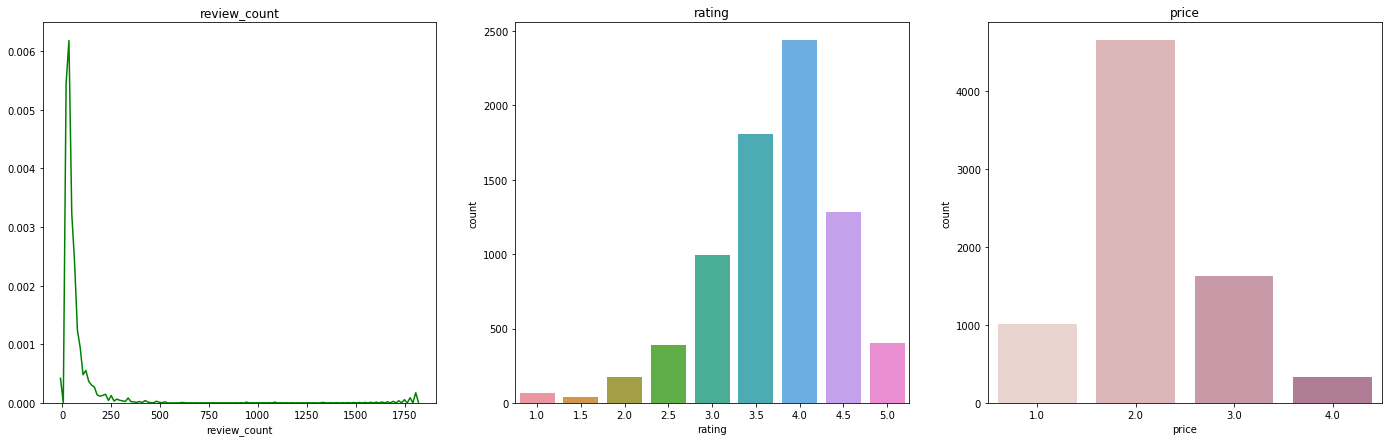

In [23]:
fig, axes = plt.subplots(1,3,figsize=(24,7))
sns.distplot(df['review_count'], hist=False, color="g", ax=axes[0]).set_title('review_count')
sns.countplot(df['rating'],ax=axes[1]).set_title('rating')
sns.countplot(df['price'],ax=axes[2]).set_title('price')

plt.show()

In [25]:
review_count=df['review_count']

In [41]:
from collections import Counter 
hist = Counter(min(h//50*50,2500) for h in review_count)
hist


Counter({0: 6589,
         50: 659,
         100: 170,
         400: 8,
         200: 41,
         250: 23,
         300: 16,
         500: 2,
         350: 6,
         150: 75,
         1300: 1,
         1050: 1,
         450: 4,
         900: 1,
         1800: 1,
         600: 1})

In [ ]:
plt.bar(hist.keys(), hist.values(), 100)